In [0]:
import pandas as pd
import numpy as np

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [0]:
df = pd.read_csv('/Volumes/workspace/default/datasets/train.csv')

In [0]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [0]:
df.shape

(891, 12)

In [0]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [0]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [0]:
df = df.drop(['Cabin'], axis =1)

In [0]:
df = df.drop(['Age'], axis =1)

In [0]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.0,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.0,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.0,2.0000,3.0000,3.0,3.0000
SibSp,891.0,0.523008,1.102743,0.0,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.0,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.0,7.9104,14.4542,31.0,512.3292


In [0]:
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,0,0,373450,8.0500,S


In [0]:
print(df.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


In [0]:
df = df.dropna()

In [0]:
df['Sex'] = df['Sex'].replace({'male': 0, 'female': 1})

In [0]:
df['Embarked'] = df['Embarked'].replace({'S': 0, 'C': 1, 'Q': 2})
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,1,0,A/5 21171,7.2500,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,1,0,PC 17599,71.2833,1
2,3,1,3,"Heikkinen, Miss. Laina",1,0,0,STON/O2. 3101282,7.9250,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,1,0,113803,53.1000,0
4,5,0,3,"Allen, Mr. William Henry",0,0,0,373450,8.0500,0


In [0]:
df.shape

(889, 10)

In [0]:
X = df[['Pclass', 'Sex', 'SibSp', 'Parch', 'Fare', 'Embarked']]
y = df[['Survived']]

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [0]:
clf = RandomForestClassifier(n_estimators=90)

In [0]:
clf.fit(X_train,y_train)

/databricks/python/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(n_estimators=90)

In [0]:
y_pred = clf.predict(X_test)

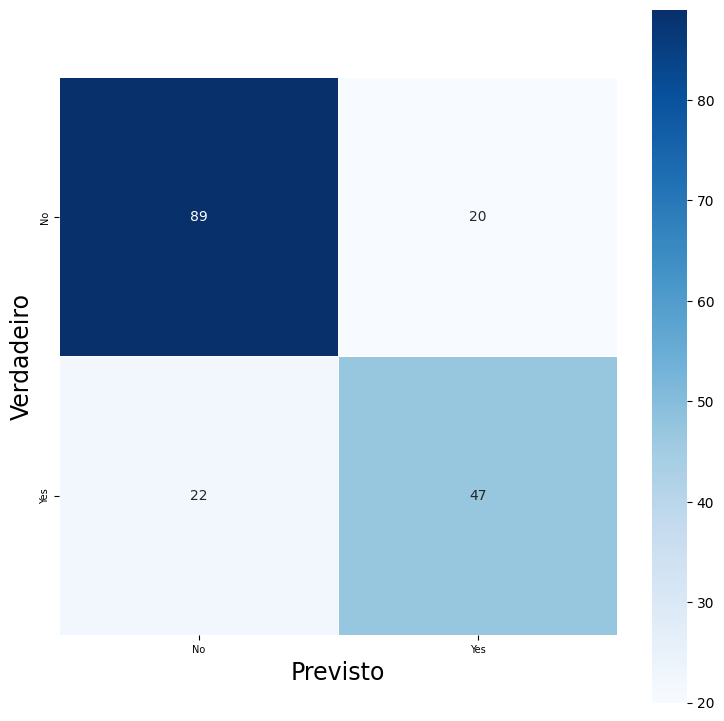

In [0]:
cf = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(9,9))
sns.heatmap(cf, annot=True,
            xticklabels=[ 'No', 'Yes'],
            yticklabels=[ 'No', 'Yes'],
            fmt = '.0f',
            linewidths=.5,
            square = True,
            cmap = 'Blues');
plt.ylabel('Verdadeiro', fontsize = 17);
plt.xlabel('Previsto', fontsize = 17);
plt.tick_params(labelsize=7);
plt.show()

In [0]:
df_test = pd.read_csv('/Volumes/workspace/default/datasets/test.csv')

In [0]:
df_test.head()

,PassengerId,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,0,0,330911,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,1,0,363272,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",male,0,0,240276,9.6875,Q
3,895,3,"Wirz, Mr. Albert",male,0,0,315154,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,1,1,3101298,12.2875,S


In [0]:
df_test = df_test.drop(['Cabin', 'Age'], axis =1)

In [0]:
df_test.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,418.0,1100.500000,120.810458,892.0,996.2500,1100.5000,1204.750000,1309.0000
Pclass,418.0,2.265550,0.841838,1.0,1.0000,3.0000,3.000000,3.0000
SibSp,418.0,0.447368,0.896760,0.0,0.0000,0.0000,1.000000,8.0000
Parch,418.0,0.392344,0.981429,0.0,0.0000,0.0000,0.000000,9.0000
Fare,418.0,35.576535,55.850103,0.0,7.8958,14.4542,31.471875,512.3292


In [0]:
print(df_test['Fare'].median())

14.4542


In [0]:
df_test['Fare'] = df_test['Fare'].replace({np.nan: df_test['Fare'].median()})

In [0]:
df_test.shape

(418, 9)

In [0]:
df_test['Sex'] = df_test['Sex'].replace({'male': 0, 'female': 1})

In [0]:
df_test['Embarked'] = df_test['Embarked'].replace({'S': 0, 'C': 1, 'Q': 2})

In [0]:
df_test.head()

,PassengerId,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",0,0,0,330911,7.8292,2
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,1,0,363272,7.0000,0
2,894,2,"Myles, Mr. Thomas Francis",0,0,0,240276,9.6875,2
3,895,3,"Wirz, Mr. Albert",0,0,0,315154,8.6625,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,1,1,3101298,12.2875,0


In [0]:
X_submit = df_test[['Pclass', 'Sex', 'SibSp', 'Parch', 'Fare', 'Embarked']]

In [0]:
y_submit = clf.predict(X_submit)

In [0]:
df_submit = pd.DataFrame({'PassengerId': df_test['PassengerId'], 'Survived': y_submit})
df_submit.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [0]:
df_submit.dtypes

PassengerId    object
Survived       object
dtype: object

In [0]:
df_submit['Survived'] = df_submit['Survived'].astype(str)
df_submit['PassengerId'] = df_submit['PassengerId'].astype(str)

In [0]:
df_submit.to_csv('/Volumes/workspace/default/datasets/Titanic_Submit3.csv', index=False) 